In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.count()

Age         714
Fare        846
Family      891
Survived    891
dtype: int64

In [6]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [7]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)

In [9]:
x_train.isnull().mean()

Age       0.202247
Fare      0.053371
Family    0.000000
dtype: float64

In [10]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [11]:
x_train['Age_imputed_median'] = x_train['Age'].fillna(median_age)
x_train['Age_imputed_mean'] = x_train['Age'].fillna(mean_age)

x_train['Fare_imputed_median'] = x_train['Fare'].fillna(median_fare)
x_train['Fare_imputed_mean'] = x_train['Fare'].fillna(mean_fare)

In [12]:
print('Variance in Age before imputation: ', x_train['Age'].var())
print('Variance in Age after median imputation: ', x_train['Age_imputed_median'].var())
print('Variance in Age after mean imputation: ', x_train['Age_imputed_mean'].var())

print('Variance in Fare before imputation:', x_train['Fare'].var())
print('Variance in Fare after median imputation: ', x_train['Fare_imputed_median'].var())
print('Variance in Fare after mean imputation: ', x_train['Fare_imputed_mean'].var())

Variance in Age before imputation:  213.78695343418542
Variance in Age after median imputation:  170.96914150349986
Variance in Age after mean imputation:  170.48832995384382
Variance in Fare before imputation: 2919.6058818903357
Variance in Fare after median imputation:  2782.4205097589265
Variance in Fare after mean imputation:  2763.565061198588


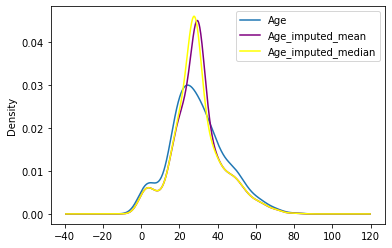

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

x_train['Age'].plot(kind='kde', ax=ax)

x_train['Age_imputed_mean'].plot(kind='kde', ax=ax, color='purple')

x_train['Age_imputed_median'].plot(kind='kde', ax=ax, color='yellow')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper right')